# Example notebook

## 1. Import dependencies and setup environment

Import a few Python libraries that we need for our data analysis. We also need to tell MINER where the input data resides and where the results should go. We assume that the reference data was downloaded from (https://networks.systemsbiology.net/downloads/miner-examples/miner_mindata.tar.gz) and resides in the directory `miner_mindata`.

MINER requires an expression matrix, and if available an identifier mapping file. See the `identifier_mappings.txt` file for an example of the structure of the mapping file. The `preprocess()` function prepares the input file into a pandas data frame that can be used for the subsequent steps.

In [6]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from miner import miner
%matplotlib inline
plt.style.use('ggplot')

DATA_DIR = "miner_mindata"
OUTPUT_DIR = "miner_example_out"

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Load expression Data
expression_path = os.path.join(DATA_DIR, "expression", "IA12Zscore.csv")
idmap_path = os.path.join(DATA_DIR, "identifier_mappings.txt")
exp_data, conv_table = miner.preprocess(expression_path, idmap_path)

completed identifier conversion.
16216 genes were converted.


## 2. Visualizing the pre-processed expression data

It can be helpful to see a visual representation of the structure of the input data. The section below helps with that.

Text(0.5, 0, 'Relative expression')

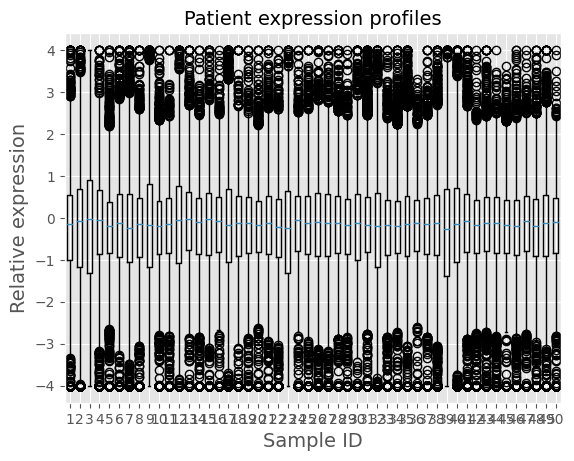

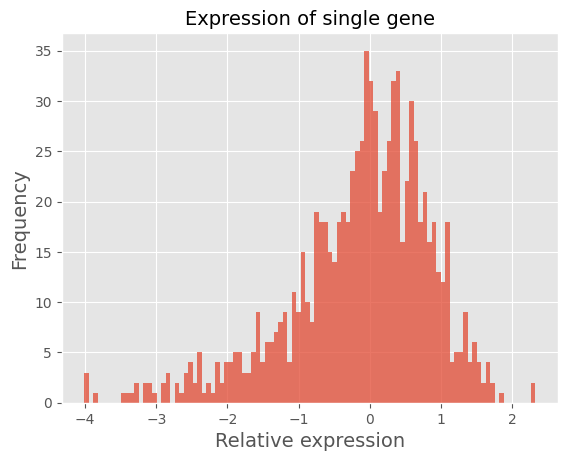

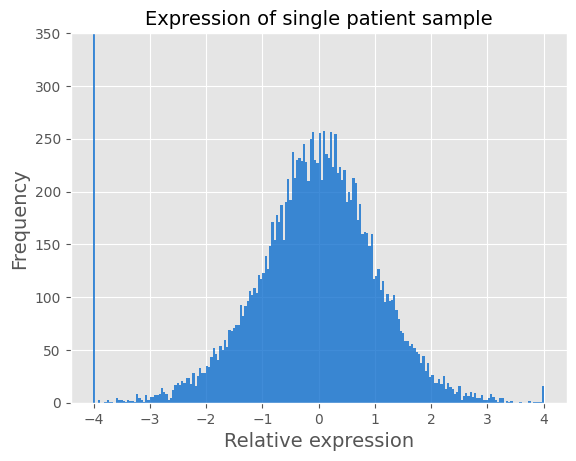

In [8]:
individual_exp_data = [exp_data.iloc[:,i] for i in range(50)]
plt.boxplot(individual_exp_data)
plt.title("Patient expression profiles", fontsize=14)
plt.ylabel("Relative expression", fontsize=14)
plt.xlabel("Sample ID", fontsize=14)
plt.figure()

plt.hist(exp_data.iloc[0,:], bins=100, alpha=0.75)
plt.title("Expression of single gene", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Relative expression", fontsize=14)
plt.figure()

plt.hist(exp_data.iloc[:,0], bins=200, color=[0,0.4,0.8], alpha=0.75)
plt.ylim(0, 350)
plt.title("Expression of single patient sample", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Relative expression", fontsize=14)